Heart Disease Diagnostic Analysis

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')

In [3]:
data=pd.read_csv('C:\\Users\\Administrator\\Downloads\\UM Project 1\\Heart Disease data.csv')
data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1025 non-null   int64  
 1   Sex                    1025 non-null   int64  
 2   ChestPainType          1025 non-null   int64  
 3   RestingBloodPressure   1025 non-null   int64  
 4   SerumCholesterol       1025 non-null   int64  
 5   FastingBloodSugar      1025 non-null   int64  
 6   RestingECG             1025 non-null   int64  
 7   MaxHeartRate           1025 non-null   int64  
 8   ExerciseInducedAngina  1025 non-null   int64  
 9   STDepression           1025 non-null   float64
 10  SlopeSTSegment         1025 non-null   int64  
 11  MajorVessels           1025 non-null   int64  
 12  Thalassemia            1025 non-null   int64  
 13  HeartDiseaseDiagnosis  1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


In [4]:
new_column_names = {
    'age': 'Age',
    'sex': 'Sex',
    'cp': 'ChestPainType',
    'trestbps': 'RestingBloodPressure',
    'chol': 'SerumCholesterol',
    'fbs': 'FastingBloodSugar',
    'restecg': 'RestingECG',
    'thalach': 'MaxHeartRate',
    'exang': 'ExerciseInducedAngina',
    'oldpeak': 'STDepression',
    'slope': 'SlopeSTSegment',
    'ca': 'MajorVessels',
    'thal': 'Thalassemia',
    'target': 'HeartDiseaseDiagnosis'
}
data.rename(columns=new_column_names, inplace=True)
data.head()

,Age,Sex,ChestPainType,RestingBloodPressure,SerumCholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExerciseInducedAngina,STDepression,SlopeSTSegment,MajorVessels,Thalassemia,HeartDiseaseDiagnosis
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBloodPressure',
       'SerumCholesterol', 'FastingBloodSugar', 'RestingECG', 'MaxHeartRate',
       'ExerciseInducedAngina', 'STDepression', 'SlopeSTSegment',
       'MajorVessels', 'Thalassemia', 'HeartDiseaseDiagnosis'],
      dtype='object')

In [6]:
data.isnull().sum()

Age                      0
Sex                      0
ChestPainType            0
RestingBloodPressure     0
SerumCholesterol         0
FastingBloodSugar        0
RestingECG               0
MaxHeartRate             0
ExerciseInducedAngina    0
STDepression             0
SlopeSTSegment           0
MajorVessels             0
Thalassemia              0
HeartDiseaseDiagnosis    0
dtype: int64

###### There is NO MISSING Values in our Dataset

## Percentage of people having Heart Disease

In [7]:
HeartDiseaseDiagnosis=data.groupby('HeartDiseaseDiagnosis').size()
HeartDiseaseDiagnosis

HeartDiseaseDiagnosis
0    499
1    526
dtype: int64

In [8]:
def heart_disease(row):
    if row==0:
        return 'Absence'
    elif row==1:
        return 'Presence'

In [9]:
#Applying converted data into our dataset with new column - Heart_Disease

data['Heart_Disease']=data['HeartDiseaseDiagnosis'].apply(heart_disease)
data.head()

,Age,Sex,ChestPainType,RestingBloodPressure,SerumCholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExerciseInducedAngina,STDepression,SlopeSTSegment,MajorVessels,Thalassemia,HeartDiseaseDiagnosis,Heart_Disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Absence
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Absence
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Absence
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Absence
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Absence


Overall rate of heart disease in the dataset.

In [10]:
hd=data.groupby('Heart_Disease')['HeartDiseaseDiagnosis'].count()
hd

Heart_Disease
Absence     499
Presence    526
Name: HeartDiseaseDiagnosis, dtype: int64

Pie Chart Creation of Heart Disease Population % using MatplotLib

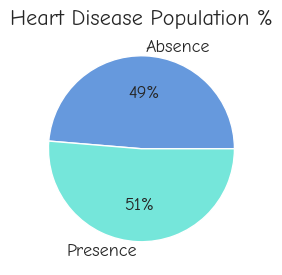

In [41]:
plt.figure(figsize=(3,4))
plt.rcParams['font.family'] = 'Comic neue'
plt.rcParams['font.size'] = 13
plt.pie(hd, labels=['Absence','Presence'], autopct='%0.0f%%', colors =['#69d', '#75E6DA'])
plt.title('Heart Disease Population', fontsize=16)
plt.show()

51 % people are suffering from Heart Disease.

Breakdown of Population by age groups.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18716\2821782161.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age', data=data, palette='icefire')


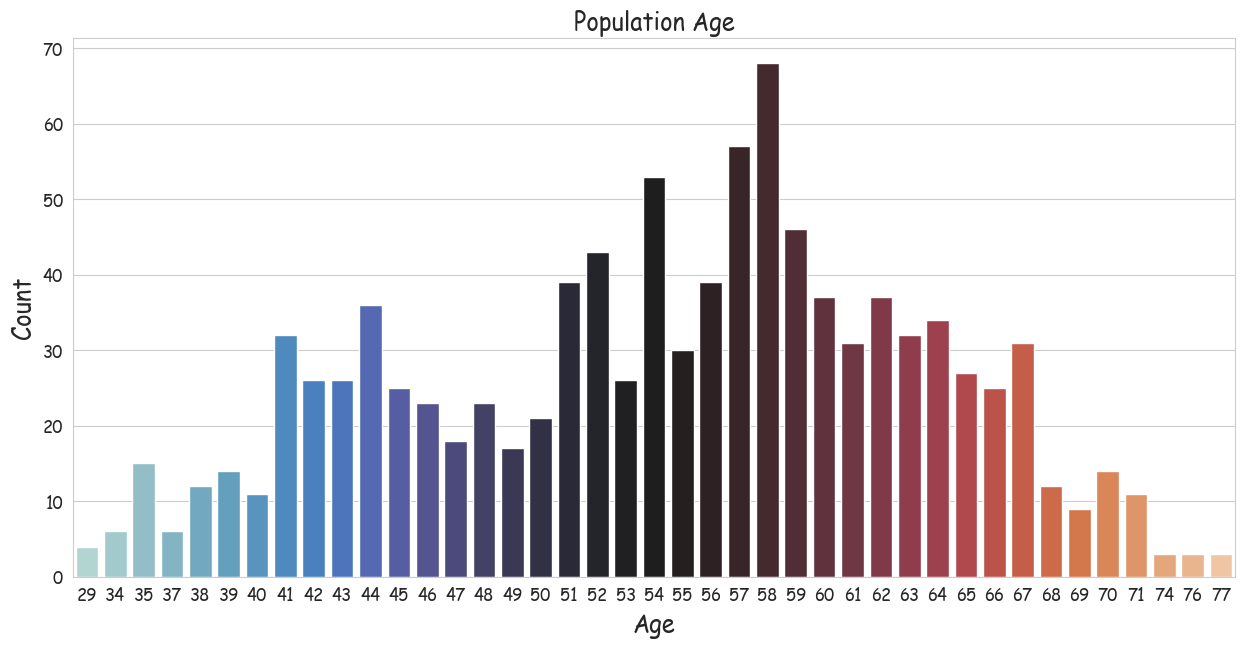

In [12]:
plt.rcParams['font.family'] = 'comic sans MS' 
plt.rcParams['font.size'] = 14
plt.figure(figsize=(15, 7))
sns.countplot(x='Age', data=data, palette='icefire')
plt.title('Population Age', fontsize=17)
plt.xlabel('Age', fontsize=17)
plt.ylabel('Count', fontsize=17)
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12) 
plt.show()

Age can be divided into ranges the elderly, middle-aged, young people.

In [13]:
#Stastical Analysis

Min_Age=data['Age'].min()
Max_Age=data['Age'].max()
Mean_Age=data['Age'].mean()
print("Minimum Age =",Min_Age)
print("Maximum Age =",Max_Age)
print("Mean Age =",Mean_Age)

Minimum Age = 29
Maximum Age = 77
Mean Age = 54.43414634146342


In [14]:
#Categorical Analysis

Young_Ages=data[(data['Age']>=29) & (data['Age']<40)]
Middle_Ages=data[(data['Age']>=40) & (data['Age']<55)]
Elderly_Ages=data[(data['Age']>55)]
print('Young Ages =',len(Young_Ages))
print('Middle Ages =',len(Middle_Ages))
print('Elderly Ages =',len(Elderly_Ages))

Young Ages = 57
Middle Ages = 419
Elderly Ages = 519


C:\Users\Administrator\AppData\Local\Temp\ipykernel_18716\3459486203.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Young_Ages','Middle_Ages','Elderly_Ages'], y=[len(Young_Ages), len(Middle_Ages), len(Elderly_Ages)], palette='magma')


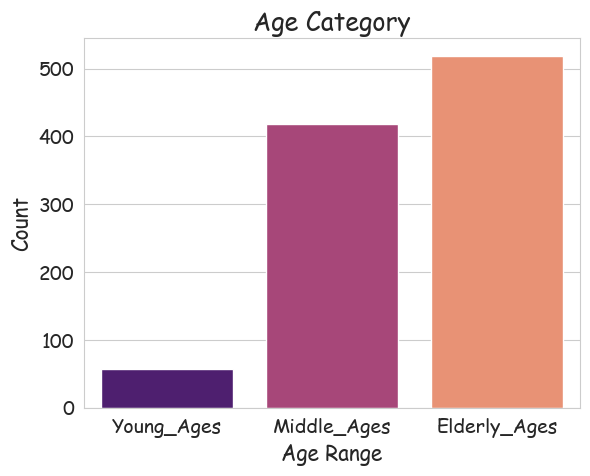

In [15]:
#Bar Plot Creation of Age Category

plt.rcParams['font.family'] = 'comic sans MS'
plt.rcParams['font.size'] = 14
sns.barplot(x=['Young_Ages','Middle_Ages','Elderly_Ages'], y=[len(Young_Ages), len(Middle_Ages), len(Elderly_Ages)], palette='magma')
plt.title('Age Category', fontsize=18)
plt.xlabel('Age Range', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

In [16]:
#Converting Numerical Data into Categorical Data

def gender(row):
    if row==1:
        return 'Male'
    elif row==0:
        return 'Female'

In [17]:
#Applying converted data into our dataset with new column - Sex1

data['Sex1']=data['Sex'].apply(gender)
data.head()

,Age,Sex,ChestPainType,RestingBloodPressure,SerumCholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExerciseInducedAngina,STDepression,SlopeSTSegment,MajorVessels,Thalassemia,HeartDiseaseDiagnosis,Heart_Disease,Sex1
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Absence,Male
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Absence,Male
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Absence,Male
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Absence,Male
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Absence,Female


In [18]:
#Converting Numerical Data into Categorical Data

def Age_range(row):
    if row>=29 and row<40:
        return 'Young Age'
    elif row>=40 and row<55:
        return 'Middle Age'
    elif row>55:
        return 'Elder Age'

In [19]:
#Applying converted data into our dataset with new column - Age_Range

data['Age_Range']=data['Age'].apply(Age_range)
data.head()

,Age,Sex,ChestPainType,RestingBloodPressure,SerumCholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExerciseInducedAngina,STDepression,SlopeSTSegment,MajorVessels,Thalassemia,HeartDiseaseDiagnosis,Heart_Disease,Sex1,Age_Range
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Absence,Male,Middle Age
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Absence,Male,Middle Age
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Absence,Male,Elder Age
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Absence,Male,Elder Age
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Absence,Female,Elder Age


C:\Anaconda\Installation\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 34.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Anaconda\Installation\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 45.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Anaconda\Installation\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 47.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Anaconda\Installation\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 54.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


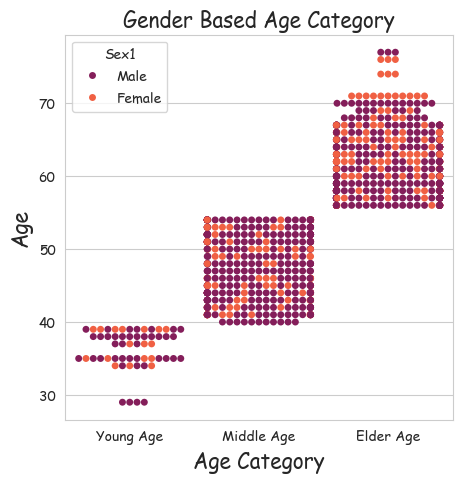

In [20]:
#Swarm Plot of Distribution of heart disease by gender.

plt.figure(figsize=(5,5))
plt.rcParams['font.family'] = 'comic sans MS'
plt.rcParams['font.size'] = 10
sns.swarmplot(x='Age_Range', y='Age', hue='Sex1', data=data, order=['Young Age','Middle Age','Elder Age'], palette='rocket')
plt.title('Gender Based Age Category', fontsize=15)
plt.xlabel('Age Category', fontsize=15)
plt.ylabel('Age', fontsize=15)
plt.show()

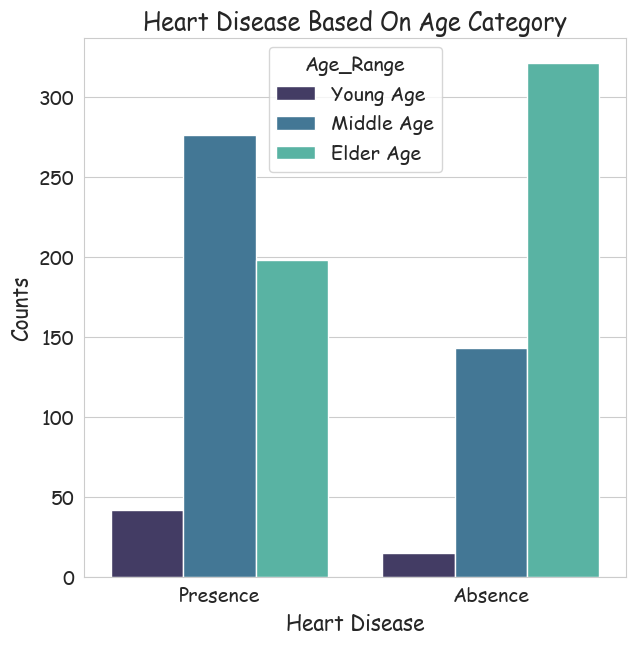

In [21]:
#Count Plot Heart Disease Based On Age Category 

plt.rcParams['font.family'] = 'comic sans MS'
plt.rcParams['font.size'] = 14
plt.figure(figsize=(7,7))
hue_order=['Young Age', 'Middle Age', 'Elder Age']
sns.countplot(x='Heart_Disease', hue='Age_Range', data=data, order=['Presence','Absence'], hue_order=hue_order, palette='mako')
plt.title('Heart Disease Based On Age Category', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

###### -> Elder Age People are most affected by Heart Disease AND Middle Age People are mostly FREE from any kind of Heart Disease

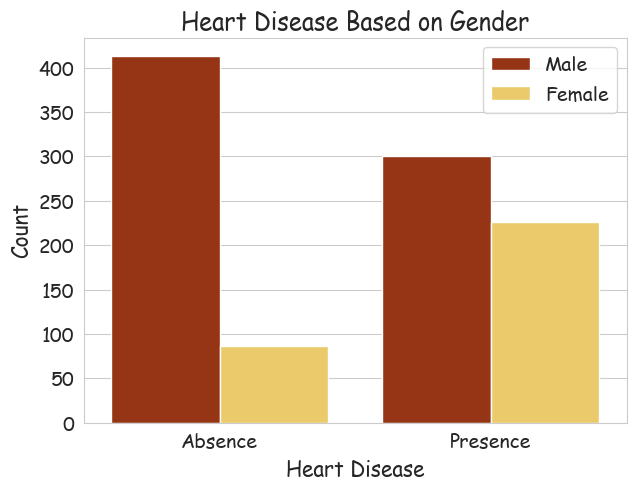

In [22]:
#Count Plot distribution of Heart Disease Based on Gender 

plt.figure(figsize=(7,5))
plt.rcParams['font.family'] = 'comic sans MS'
plt.rcParams['font.size'] = 14
sns.countplot(x=data['Heart_Disease'], hue='Sex1', data=data, palette='afmhot')
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(labels=['Male','Female'])
plt.title('Heart Disease Based on Gender',fontsize=17)
plt.show()

###### -> We can see that Males are more prone to Heart Disease

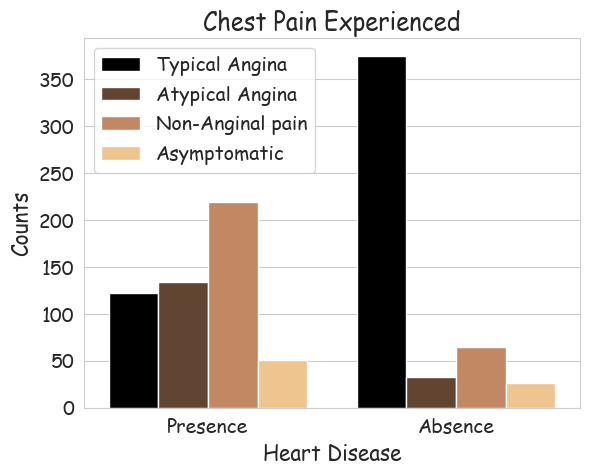

In [23]:
#Count Plot for Chest Pain Experienced.

plt.rcParams['font.family'] = 'comic sans MS'
plt.rcParams['font.size'] = 14
sns.countplot(x=data['Heart_Disease'], hue='ChestPainType', data=data, order=['Presence','Absence'], palette = 'copper')
plt.title('Chest Pain Experienced', fontsize=17)
plt.xlabel('Heart Disease',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

It seems people having Non-Anginal pain have a higher chance of heart disease

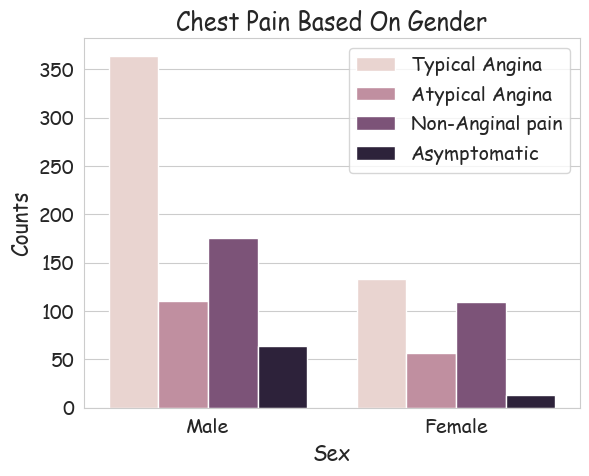

In [24]:
#Count Plot for Chest Pain Based On Gender.

plt.rcParams['font.family'] = 'comic sans MS'
plt.rcParams['font.size'] = 14
sns.countplot(x=data['Sex1'], hue='ChestPainType', data=data)
plt.title('Chest Pain Based On Gender', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

We can see that a higher number of men are suffering from Typical Angina type of Chest Pain.

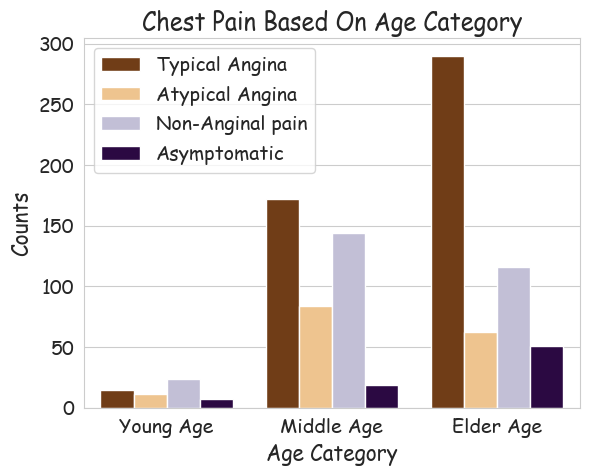

In [25]:
#Count Plot for Chest Pain Based On Age Category.

plt.rcParams['font.family'] = 'comic sans MS'
plt.rcParams['font.size'] = 14
sns.countplot(x=data['Age_Range'], hue='ChestPainType', data=data, order=['Young Age', 'Middle Age', 'Elder Age'], palette = 'PuOr')
plt.title('Chest Pain Based On Age Category', fontsize=17)
plt.xlabel('Age Category', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

There is very high number of Typical Angima Pain in Elderly age Category.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18716\1078804770.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex1', y='RestingBloodPressure', data=data, palette='mako')


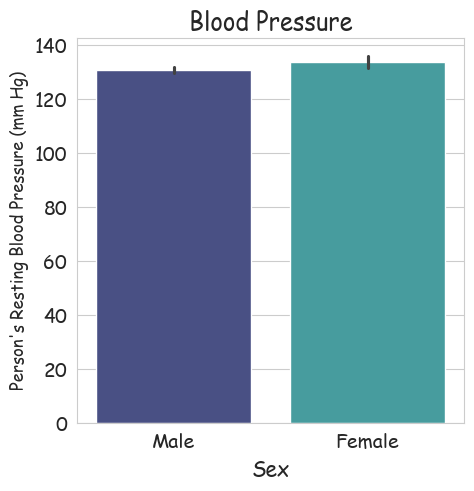

In [26]:
#Bar Plot for Person's Resting Blood Pressure (mm Hg) 

plt.rcParams['font.family'] = 'comic sans MS'
plt.rcParams['font.size'] = 14
plt.figure(figsize=(5,5))
sns.barplot(x='Sex1', y='RestingBloodPressure', data=data, palette='mako')
plt.title("Blood Pressure", fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel("Person's Resting Blood Pressure (mm Hg)", fontsize=12)
plt.show()

Blood Pressure Rate is almost equal in Male and Female.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18716\4117580838.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex1', y='SerumCholesterol', data=data, palette='turbo')


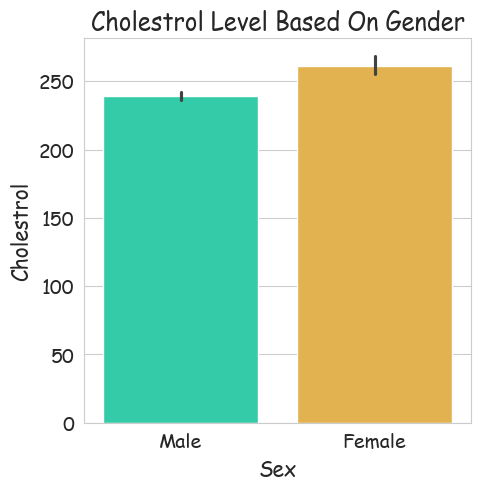

In [27]:
#Bar Plot for Cholestrol Level Based On Gender.

plt.rcParams['font.family'] = 'comic sans MS'
plt.rcParams['font.size'] = 14
plt.figure(figsize=(5,5))
sns.barplot(x='Sex1', y='SerumCholesterol', data=data, palette='turbo')
plt.title("Cholestrol Level Based On Gender", fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel("Cholestrol", fontsize=15)
plt.show()

Females exhibit higher cholesterol levels compared to males.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18716\2931916172.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Heart_Disease', y='SerumCholesterol', data=data, palette='ocean_r')


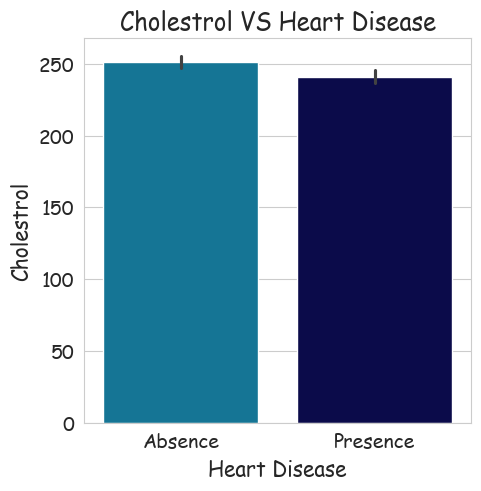

In [28]:
#Bar Plot for Cholestrol VS Heart Disease.

plt.rcParams['font.family'] = 'comic sans MS'
plt.rcParams['font.size'] = 14
plt.figure(figsize=(5,5))
sns.barplot(x='Heart_Disease', y='SerumCholesterol', data=data, palette='ocean_r')
plt.title('Cholestrol VS Heart Disease', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Cholestrol', fontsize=15)
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18716\2928773697.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Heart_Disease', y='RestingBloodPressure', data=data, palette='tab20b_r')


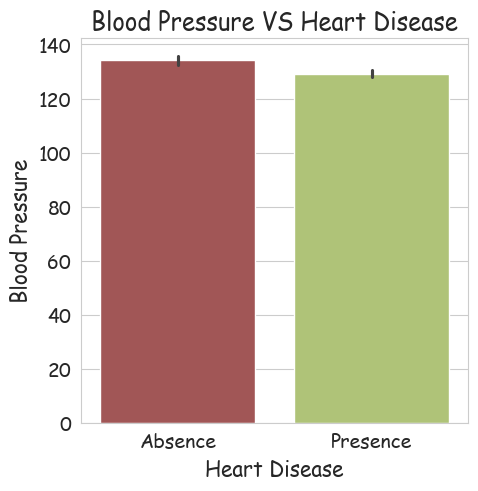

In [29]:
#Bar Plot for Blood Pressure VS Heart Disease.

plt.rcParams['font.family'] = 'comic sans MS'
plt.rcParams['font.size'] = 14
plt.figure(figsize=(5,5))
sns.barplot(x='Heart_Disease', y='RestingBloodPressure', data=data, palette='tab20b_r')
plt.title('Blood Pressure VS Heart Disease', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Blood Pressure', fontsize=15)
plt.show()

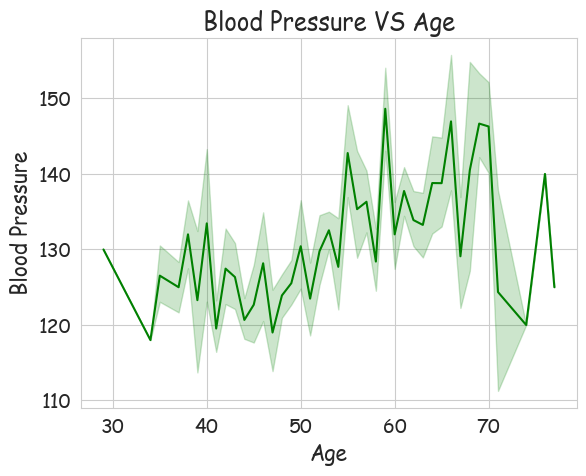

In [30]:
#Line Plot for Blood Pressure VS Age.

plt.rcParams['font.family'] = 'comic sans MS'
plt.rcParams['font.size'] = 14
sns.lineplot(x='Age', y='RestingBloodPressure', data=data, color='g')
plt.title('Blood Pressure VS Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Blood Pressure', fontsize=15)
plt.show()

Blood pressure increases between the ages of 50 and 60 and it continues this pattern into the 70s.

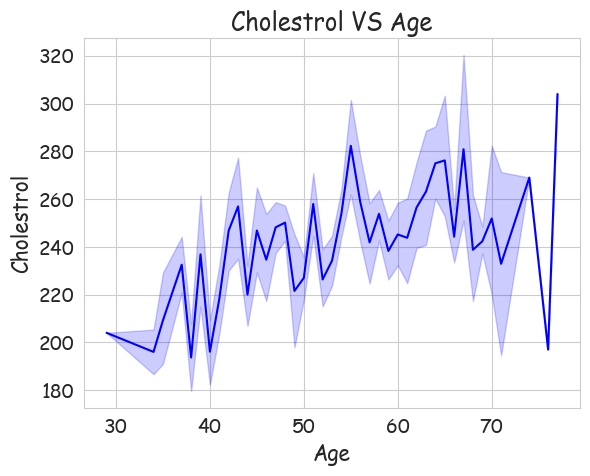

In [31]:
#Line Plot for Cholestrol VS Age.

plt.rcParams['font.family'] = 'comic sans MS'
plt.rcParams['font.size'] = 14
sns.lineplot(x='Age', y='SerumCholesterol', data=data, color='b')
plt.title('Cholestrol VS Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Cholestrol', fontsize=15)
plt.show()

Cholestrol Increases in the age group of 60-70.

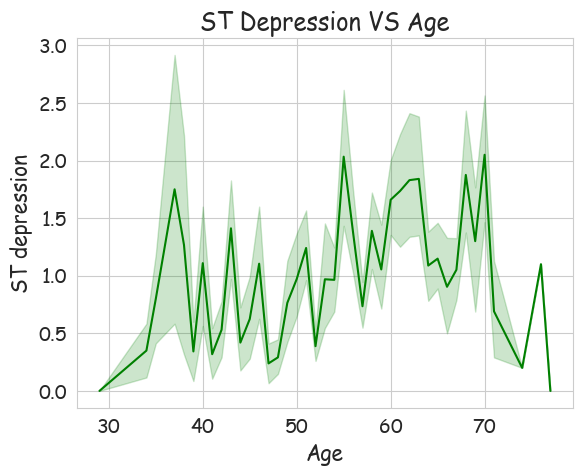

In [32]:
#Line Plot for ST Depression VS Age.

plt.rcParams['font.family'] = 'comic sans MS'
plt.rcParams['font.size'] = 14
sns.lineplot(x='Age', y='STDepression', data=data, color='g')
plt.title('ST Depression VS Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('ST depression', fontsize=15)
plt.show()

we can observe from here that ST depression mostly increases bw the age group of 30-40.

###### -> ST depression refers to a finding on an electrocardiogram, wherein the trace in the ST segment is abnormally low below the baseline.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18716\318842509.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x ='Sex1', y ='STDepression', data=data, palette='twilight_r')


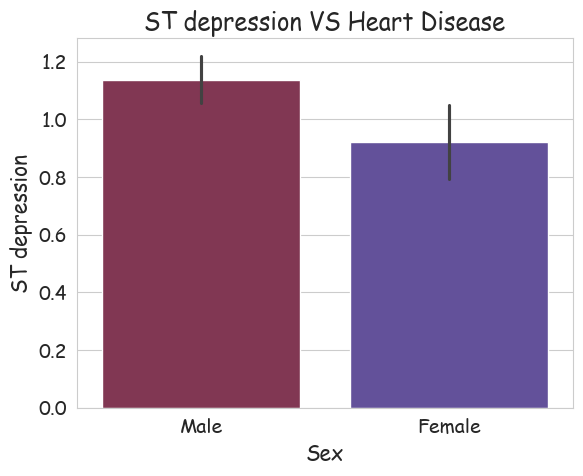

In [34]:
#Bar Plot for ST depression VS Heart Disease.

plt.rcParams['font.family'] = 'comic sans MS'
plt.rcParams['font.size'] = 14
sns.barplot(x ='Sex1', y ='STDepression', data=data, palette='twilight_r')
plt.title('ST depression VS Heart Disease', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('ST depression', fontsize=15)
plt.show()

Males are more prone to ST depression compared to females.